In [1]:
import turicreate as tc
image_train = tc.SFrame('image_train_data/')
image_test = tc.SFrame("image_test_data/")

# 1

In [2]:
sketch = tc.Sketch(image_train['label'])
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


# 2

In [3]:
cat_data = image_train[image_train['label']=='cat']
dog_data = image_train[image_train['label']=='dog']
automobile_data = image_train[image_train['label']=='automobile']
bird_data = image_train[image_train['label']=='bird']

In [4]:
a = [cat_data,dog_data,automobile_data,bird_data]
for x in a:
    print(len(x))

509
509
509
478


In [5]:
dog_model = tc.nearest_neighbors.create(dog_data,features=['deep_features'],label='id')
cat_model = tc.nearest_neighbors.create(cat_data,features=['deep_features'],label='id')
automobile_model = tc.nearest_neighbors.create(automobile_data,features=['deep_features'],label='id')
bird_model = tc.nearest_neighbors.create(bird_data,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

In [7]:
cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 8.489ms      |

| Done         |         | 100         | 33.981ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


,SArray
0,

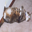

In [25]:
# getting image
image_train[image_train['id']==16289]['image'].explore()

In [8]:
dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.766ms      |

| Done         |         | 100         | 23.199ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

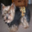

In [26]:
# getting image
image_train[image_train['id']==16976]['image'].explore()

# 3

In [9]:
cat_query = cat_model.query(image_test[0:1])
dog_query = dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.994ms      |

| Done         |         | 100         | 26.693ms     |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.848ms      |

| Done         |         | 100         | 25.247ms     |

+--------------+---------+-------------+--------------+

In [10]:
sum(cat_query['distance'])/5

36.15573070978294

In [11]:
sum(dog_query['distance'])/5

37.77071136184157

# 4

In [12]:
cat_test_data = image_test[image_test['label']=='cat']
dog_test_data = image_test[image_test['label']=='dog']
automobile_test_data = image_test[image_test['label']=='automobile']
bird_test_data = image_test[image_test['label']=='bird']

In [13]:
# x_y --> for each image in x recommend nearest image in y
# x --> test data
# y --> train data

dog_dog = dog_model.query(dog_test_data,k=1)
dog_cat = cat_model.query(dog_test_data,k=1)
dog_automobile = automobile_model.query(dog_test_data,k=1)
dog_bird = bird_model.query(dog_test_data,k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 383.773ms    |

| Done         | 509000  | 100         | 444.251ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 394.4ms      |

| Done         | 509000  | 100         | 463.547ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 84000   | 16.5029     | 406.365ms    |

| Done         | 509000  | 100         | 450.704ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 40000   | 8.3682      | 368.441ms    |

| Done         | 478000  | 100         | 405.605ms    |

+--------------+---------+-------------+--------------+

In [14]:
dog_cat

query_label,reference_label,distance,rank
0,33,36.419607706754384,1
1,30606,38.83532688735542,1
2,5545,36.97634108541546,1
3,19631,34.575007291446106,1
4,7493,34.77882479101661,1
5,47044,35.11715782924591,1
6,13918,40.60958309132649,1
7,10981,39.90368673062214,1
8,45456,38.067470016821176,1
9,44673,42.72587329506032,1


In [15]:
dog_dog

query_label,reference_label,distance,rank
0,49803,33.47735903726335,1
1,5755,32.84584956840554,1
2,20715,35.03970731890584,1
3,13387,33.90103276968193,1
4,12089,37.484925090925636,1
5,6094,34.94516534398124,1
6,3431,39.095727834463545,1
7,6184,37.76961310322034,1
8,2167,35.10891446032838,1
9,7776,43.242283258453455,1


In [16]:
dog_automobile

query_label,reference_label,distance,rank
0,33859,41.95797614571203,1
1,2046,46.00213318067788,1
2,19594,42.946229069238804,1
3,11000,41.68660600484793,1
4,19594,39.22696649347584,1
5,49314,40.58451176980721,1
6,40822,45.10673529610854,1
7,44997,41.32211409739762,1
8,33859,41.82446549950164,1
9,33859,45.497692940110376,1


In [17]:
dog_bird

query_label,reference_label,distance,rank
0,44658,41.75386473035126,1
1,9215,41.3382958924861,1
2,36675,38.615759085289056,1
3,12582,37.08922699538214,1
4,36122,38.27228869398105,1
5,8736,39.146208923590486,1
6,38991,40.523040105962316,1
7,44177,38.19479183926956,1
8,4549,40.156713166131446,1
9,40225,45.55979626027668,1


In [18]:
distance = tc.SFrame({'dog_dog':dog_dog['distance'],
                     'dog_cat':dog_cat['distance'],
                     'dog_automobile':dog_automobile['distance'],
                     'dog_bird':dog_bird['distance']})
distance

dog_automobile,dog_bird,dog_cat,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [19]:
def check(row):
    if row['dog_dog'] < row['dog_cat'] and row['dog_dog'] < row['dog_automobile'] and row['dog_dog'] < row['dog_bird']:
        return 1
    else:
        return 0

    
distance['check'] = distance.apply(check)

In [20]:
distance

dog_automobile,dog_bird,dog_cat,dog_dog,check
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335,1
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554,1
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584,1
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193,1
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636,0
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124,1
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545,1
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034,1
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838,1
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455,0


In [21]:
sum(distance['check'])

678

In [22]:
len(distance)

1000

In [23]:
accu = sum(distance['check'])/len(distance)

In [27]:
accu*100

67.80000000000001